In [1]:
import pyro
from pyro.infer import MCMC, NUTS, HMC

In [2]:
!ls ebm-wgan/api

debug.py		      train_5d_gaussins.py
ebm_5d_gaussians_sampling.py  train_swissroll.py
ebm_sampling.py		      utils.py
paths.py		      wgan_2d_models.py
__pycache__		      wgan_fully_connected_models.py
train_25gaussians.py	      wgan_train.py


In [3]:
!ls /home/daniil/gans-mcmc/ebm-wgan/notebook/models

2020_08_20-19_07_41_discriminator.pth  2d_gaussian
2020_08_20-19_07_41_generator.pth


In [4]:
import os, sys
cwd = os.getcwd()

repo_name = 'ebm_wgan'
repo_path = os.path.join(cwd, 'ebm-wgan')
api_path = os.path.join(repo_path, 'api')
#models_path = os.path.join(AUX_DATA_ROOT, 'models')
notebook_path = os.path.join(repo_path, 'notebook')
models_path = os.path.join(notebook_path, 'models/2d_gaussian')
sys.path.append(api_path)

In [5]:
import numpy as np
import sklearn.datasets
import time
import random

from matplotlib import pyplot as plt

import torch, torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
from torch import autograd
from torch.distributions import MultivariateNormal, Normal, Independent, Uniform

from paths import path_to_save
from utils import (prepare_25gaussian_data, 
                   prepare_swissroll_data, 
                   prepare_train_batches, 
                   sample_fake_data)
from wgan_2d_models import (Generator_2d, 
                            Discriminator_2d, 
                            weights_init_1, 
                            weights_init_2)
from wgan_train import train_wgan

In [6]:
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

train_dataset_size = 100000
BATCH_SIZE = 256            
X_train = prepare_25gaussian_data(train_dataset_size)
X_train_batches = prepare_train_batches(X_train, BATCH_SIZE) 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
n_dim = 2
G = Generator_2d(n_dim = n_dim).to(device)
D = Discriminator_2d().to(device)

In [7]:
import glob
discriminator_regexp = os.path.join(models_path, "*_discriminator.pth")
generator_regexp = os.path.join(models_path, "*_generator.pth")
discriminator_name = [f for f in glob.glob(discriminator_regexp)][0]
generator_name = [f for f in glob.glob(generator_regexp)][0]

In [8]:
G.load_state_dict(torch.load(generator_name))
D.load_state_dict(torch.load(discriminator_name))

<All keys matched successfully>

In [9]:
epoch = 19500
path_to_save = None
batch_size_sample = 5000  

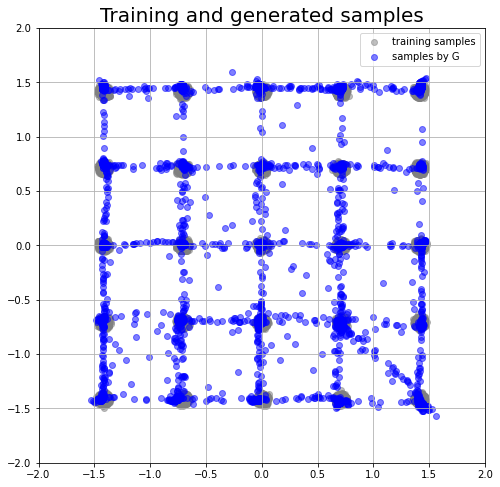

In [10]:
sample_fake_data(G, X_train, epoch, path_to_save, batch_size_sample)

In [11]:
num_points = 700
a = torch.linspace(-3.0, 3.0, num_points)
b = torch.linspace(-3.0, 3.0, num_points)
x_t = a.view(-1, 1).repeat(1, b.size(0))
y_t = b.view(1, -1).repeat(a.size(0), 1)

In [12]:
x_t_batch = x_t.view(-1 , 1)
y_t_batch = y_t.view(-1 , 1)
batch = torch.zeros((x_t_batch.shape[0], 2))
batch[:, 0] = x_t_batch[:, 0]
batch[:, 1] = y_t_batch[:, 0]

In [13]:
discr_batch = D(batch.to(device))

In [14]:
heatmap = discr_batch[:, 0].view((num_points, num_points)).detach().cpu().numpy()

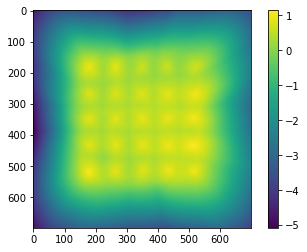

In [15]:
import matplotlib.pyplot as plt
import numpy as np


def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()


heatmap2d(heatmap)